In [8]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import yaml
from addict import Dict as AttrDict
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [9]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [10]:
# !pip install -r requirements/cu121.txt

## Imports

In [11]:
!nvidia-smi

Fri Jul  5 16:29:12 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          On  |   00000000:03:00.0 Off |                    0 |
| N/A   43C    P0             54W /  300W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [31]:
benchmark_path = Path("outputs/topography/benchmark1.csv")
df_og = pd.read_csv("outputs/topography/benchmark1.csv")
df = (
    df_og.copy()
    .sort_values(
        [
            "data.batch_size",
            "model.synapses_per_neuron",
            "model.connectivity_std",
            "model.sparse_format",
            "model.mm_function",
            "avg_time",
        ]
    )
    .reset_index(drop=True)
)
df = df.drop(df[df["model.connectivity_std"] == 1000].index)

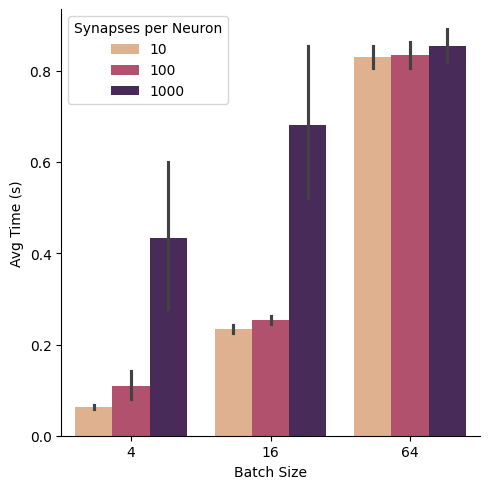

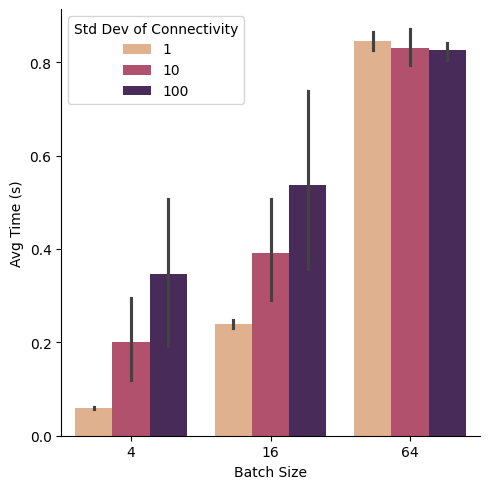

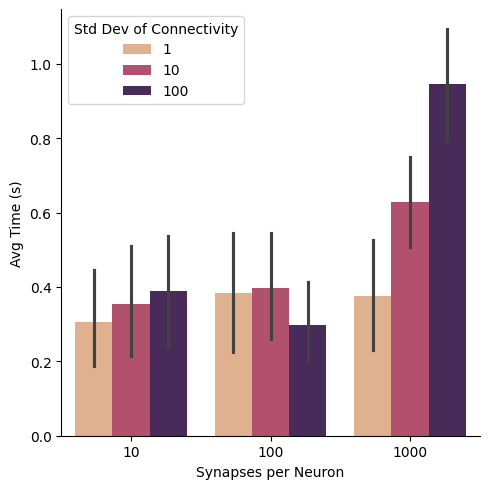

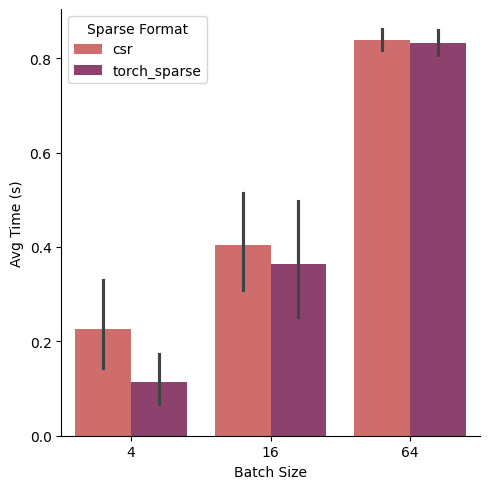

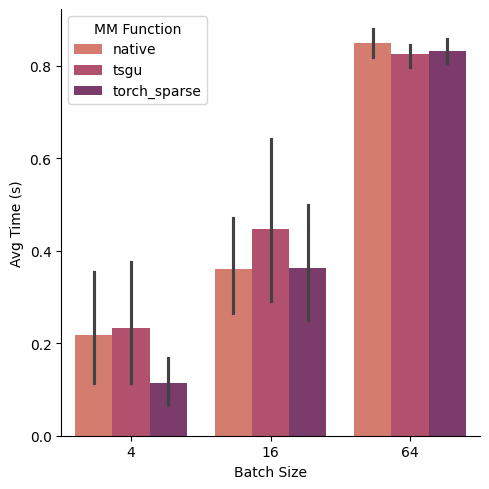

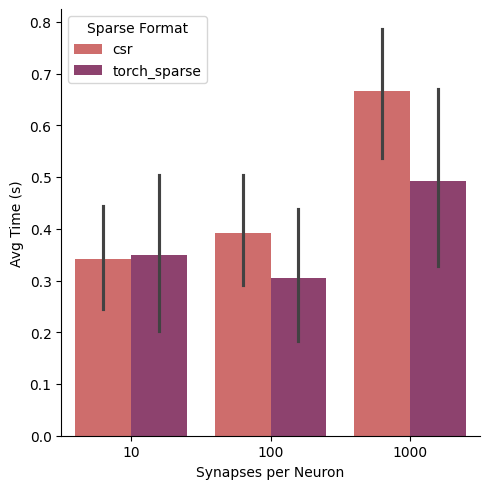

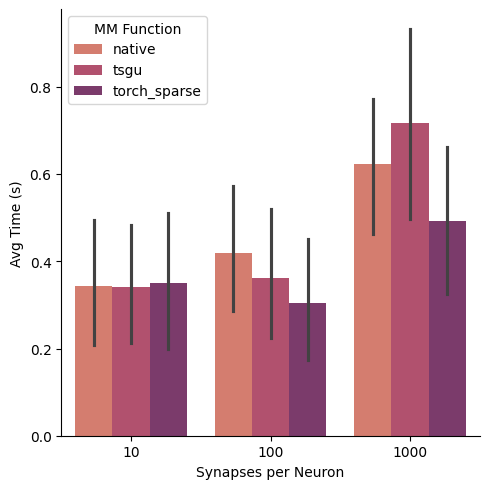

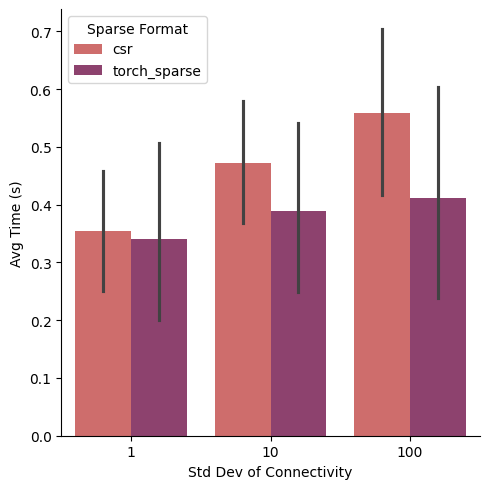

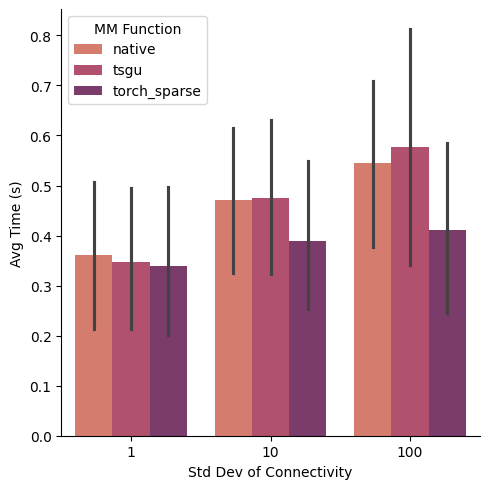

In [36]:
plots_kwargs = yaml.safe_load(Path("notebooks/plots_kwargs.yaml").read_text())
plots_kwargs = [AttrDict(x) for x in plots_kwargs]
for plot_kwargs in plots_kwargs:
    plot_kwargs.sns_kwargs.hue_norm = (
        LogNorm() if plot_kwargs.sns_kwargs.hue_norm == "lognorm" else None
    )
    g = sns.catplot(
        df,
        **plot_kwargs.sns_kwargs,
        kind="bar",
        estimator="mean",
        palette="flare",
        sharex=True,
        sharey=True,
        legend_out=False,
    )
    g.set_axis_labels(*plot_kwargs.axis_labels)
    if plot_kwargs.legend_title:
        g.legend.set_title(plot_kwargs.legend_title)
    plt.show()

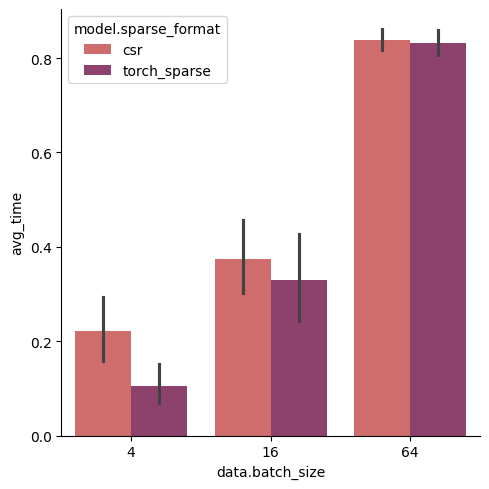

In [17]:
g = sns.catplot(
    df,
    kind="bar",
    x="data.batch_size",
    y="avg_time",
    hue="model.sparse_format",
    # col="data.batch_size",
    estimator="mean",
    palette="flare",
    legend_out=False,
)
# g.set_titles("Batch Size {col_name}")
# g.set_axis_labels("Sparse Format", "Avg Time (s)")
# g.legend.set_title("Synapses per Neuron")
plt.show()

In [40]:
# benchmark_path = Path("outputs/topography/benchmark1.csv")
# df = pd.read_csv('outputs/topography/benchmark1.csv')
# df.head()
# new_columns = []
# for column in df.columns:
#     split = column.split('_', maxsplit=1)
#     if split[0] in ("data", "model", "optimizer", "train", "visualize", "benchmark"):
#         assert len(split) == 2
#         new_split = split[1].split('_', maxsplit=2)
#         if len(new_split) > 2 and new_split[0] == "grad" and new_split[1] == "clip":
#             prefix = "grad_clip"
#             postfix = "_".join(new_split[2:])
#             new_columns.append(f"{split[0]}.{prefix}.{postfix}")
#         else:
#             new_columns.append(f"{split[0]}.{split[1]}")
#     else:
#         new_columns.append(column)
# df.columns = new_columns
# df["model.sheet_size"] = [[150, 300]]*df.shape[0]
# df.head()

In [78]:
# new_benchmark_path = benchmark_path.with_name("benchmark2.csv")
# df.to_csv(
#     new_benchmark_path.with_name("benchmark2.csv"),
#     mode="a",
#     header=not new_benchmark_path.with_name("benchmark2.csv").exists(),
#     index=False,
# )